In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv('addr_csv.csv', index_col=['Date'], parse_dates=['Date'])
data.head(10)

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2010-07-21,24.333,24.333,23.946,23.946,43321,0
2010-07-22,24.644,24.644,24.362,24.487,18031,0
2010-07-23,24.759,24.759,24.314,24.507,8897,0
2010-07-26,24.624,24.624,24.449,24.595,19443,0
2010-07-27,24.477,24.517,24.431,24.517,8456,0
2010-07-28,24.477,24.517,24.352,24.431,4967,0
2010-07-29,24.527,24.527,24.256,24.256,1238,0
2010-07-30,24.228,24.333,24.228,24.333,618,0
2010-08-02,24.916,24.926,24.664,24.839,7161,0


In [97]:
drop_cols = ['Volume', 'OpenInt']

data.drop(drop_cols, axis=1, inplace=True)
data.head()

,Open,High,Low,Close
Date,,,,
2010-07-21,24.333,24.333,23.946,23.946
2010-07-22,24.644,24.644,24.362,24.487
2010-07-23,24.759,24.759,24.314,24.507
2010-07-26,24.624,24.624,24.449,24.595
2010-07-27,24.477,24.517,24.431,24.517


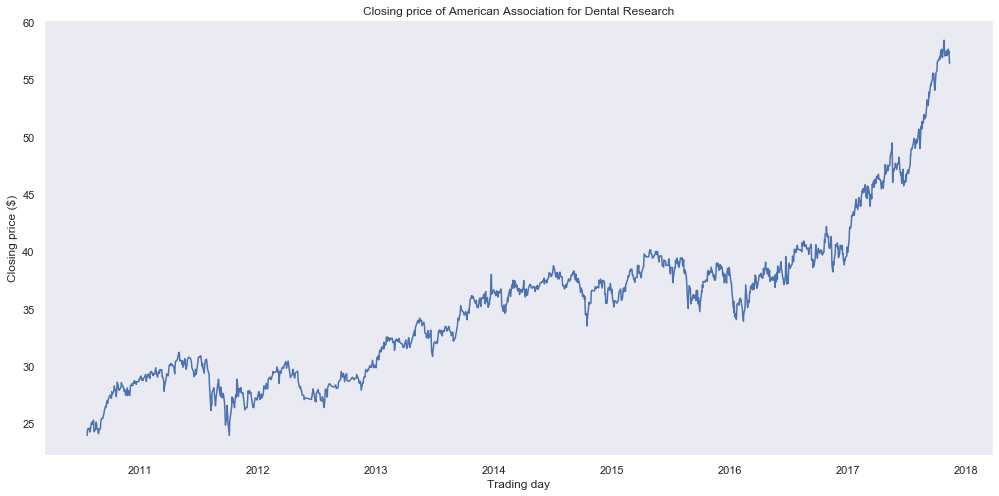

In [98]:
plt.figure(figsize=(17, 8))
plt.plot(data.Close)
plt.title('Closing price of American Association for Dental Research')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

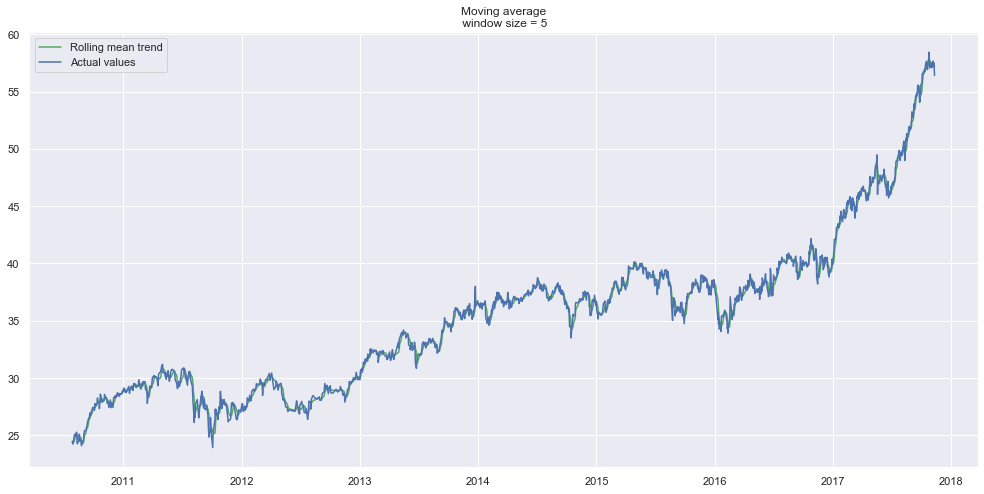

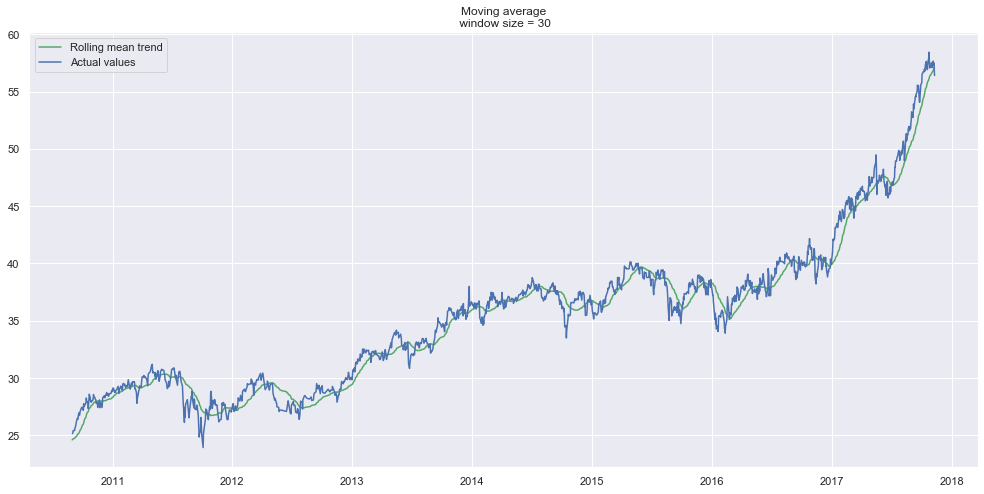

In [99]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    rolling_mean = series.rolling(window=window).mean()
 
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

#Smooth by the previous 5 days (by week)
plot_moving_average(data.Close, 5)

#Smooth by the previous month (30 days)
plot_moving_average(data.Close, 30)

#Smooth by previous quarter (90 days)
#plot_moving_average(data.Close, 90, plot_intervals=True)

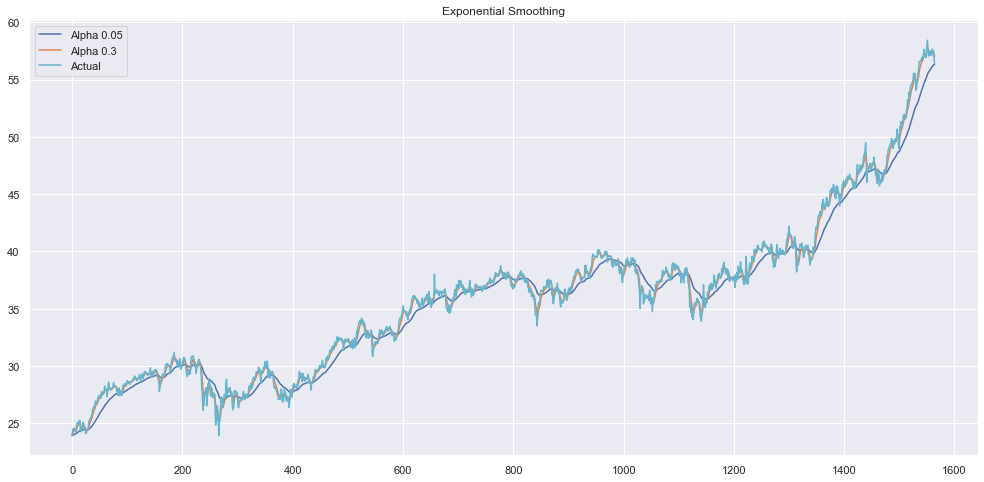

In [100]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
        
plot_exponential_smoothing(data.Close, [0.05, 0.3])

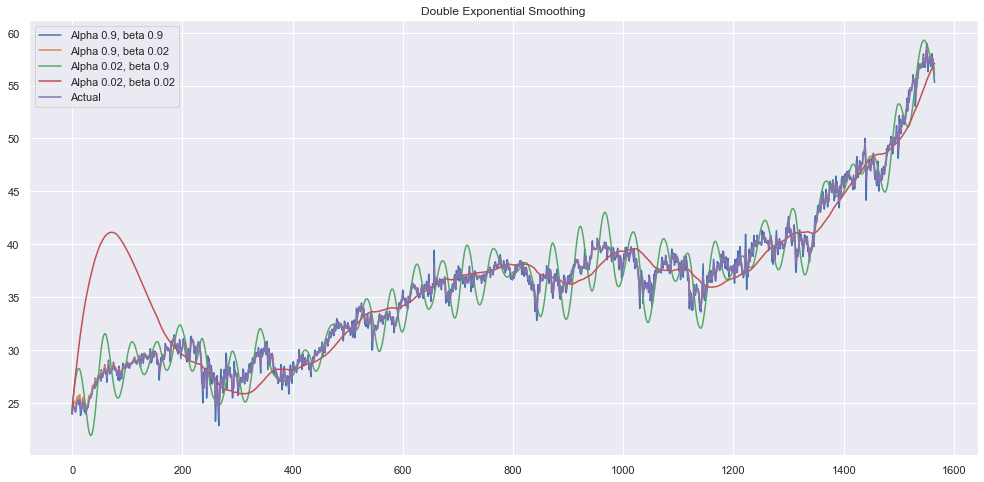

In [101]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

plot_double_exponential_smoothing(data.Close, alphas=[0.9, 0.02], betas=[0.9, 0.02])

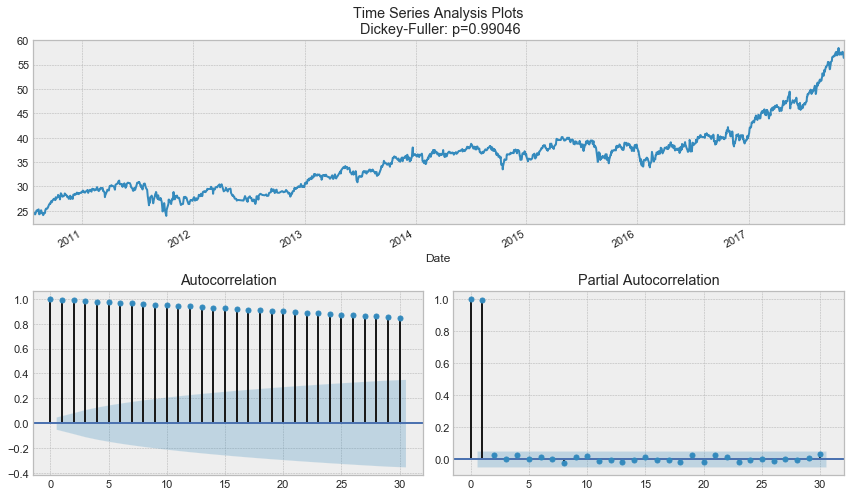

In [102]:
import statsmodels.api as sm
import statsmodels as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(data.Close, lags=30)

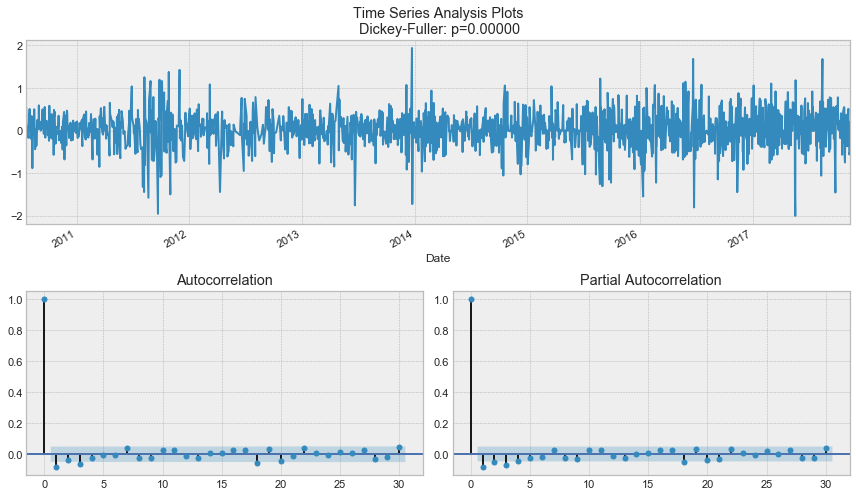

In [103]:
# Take the first difference to remove to make the process stationary
data_diff = data.Close - data.Close.shift(1)

tsplot(data_diff[1:], lags=30)

In [195]:
import pandas as pd
stock1 = pd.read_csv('addr_csv.csv', parse_dates=[0])

In [196]:
stock1.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-07-21,24.333,24.333,23.946,23.946,43321,0
1,2010-07-22,24.644,24.644,24.362,24.487,18031,0
2,2010-07-23,24.759,24.759,24.314,24.507,8897,0
3,2010-07-26,24.624,24.624,24.449,24.595,19443,0
4,2010-07-27,24.477,24.517,24.431,24.517,8456,0


In [197]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [198]:
stock1.head

<bound method NDFrame.head of            Date    Open     High      Low    Close  Volume  OpenInt
0    2010-07-21  24.333  24.3330  23.9460  23.9460   43321        0
1    2010-07-22  24.644  24.6440  24.3620  24.4870   18031        0
2    2010-07-23  24.759  24.7590  24.3140  24.5070    8897        0
3    2010-07-26  24.624  24.6240  24.4490  24.5950   19443        0
4    2010-07-27  24.477  24.5170  24.4310  24.5170    8456        0
...         ...     ...      ...      ...      ...     ...      ...
1560 2017-11-06  57.610  57.7372  57.2285  57.6500   41601        0
1561 2017-11-07  57.290  57.3460  57.1446  57.2850   50935        0
1562 2017-11-08  57.310  57.5500  57.2200  57.4900   71770        0
1563 2017-11-09  57.230  57.2300  56.7100  56.9265   53130        0
1564 2017-11-10  56.960  56.9600  56.3909  56.4000   29233        0

[1565 rows x 7 columns]>

In [199]:
stock1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

In [203]:
# Need to remove NA
# Regression - Try to predict Close price(y) from non Close columns (X)
# Get training set (X_train)
def valid(col):
    return 'Close' not in col and 'Date' not in col and col != 'OpenInt_0'
stock1 = stock1.dropna()

# we remove the last 600 observation to get a good accuracy
X = stock1[[x for x in stock1.columns if valid(x)]].iloc[:-600]
y = stock1.Close.shift(-600).dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [204]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,955,956,957,958,959,960,961,962,963,964
Open,24.333,24.644,24.759,24.624,24.477,24.477,24.527,24.228,24.916,24.966,...,40.133,40.133,39.879,39.701,39.436,39.436,39.436,39.436,39.800,39.731
High,24.333,24.644,24.759,24.624,24.517,24.517,24.527,24.333,24.926,25.069,...,40.133,40.133,39.879,39.957,39.436,39.436,39.436,39.436,39.810,39.731
Low,23.946,24.362,24.314,24.449,24.431,24.352,24.256,24.228,24.664,24.966,...,40.133,40.133,39.850,39.584,39.436,39.436,39.436,39.436,39.661,39.661
Volume,43321.000,18031.000,8897.000,19443.000,8456.000,4967.000,1238.000,618.000,7161.000,11516.000,...,101.000,101.000,407.000,2237.000,610.000,7.000,13.000,101.000,1525.000,967.000
OpenInt,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [205]:
# Create a model 
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [206]:
# Get R2 measure (indicator of accuracy 1 is perfect 0 is horrible)
rf_model.score(X_test, y_test)

0.7481071604867473

In [207]:
type(y_test)

pandas.core.series.Series

In [208]:
pd.concat([pd.Series(rf_model.predict(X_test)), y_test.reset_index(
drop=True)], axis=1)

,0,Close
0,45.91438,48.9984
1,37.07180,37.5540
2,37.26960,38.1580
3,38.28660,38.9990
4,36.95750,36.0260
...,...,...
237,37.45450,36.4780
238,37.77630,39.5340
239,38.47160,35.9740
240,35.41820,35.2290


In [209]:
sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

[('Low', 0.5839011991725335),
 ('High', 0.18836567009346977),
 ('Open', 0.12620653045125846),
 ('Volume', 0.10152660028273837),
 ('OpenInt', 0.0)]